In [1]:
# NON ESEGUIRE SEREVE PER RIMUOVERE IMMMAGINI A CAZZO !!!!!!!!!!!!!!!

import os
import shutil
# Definisci il percorso della cartella
folder_path = "/content/drive/MyDrive/"

# Ottieni la lista di tutti i file nella cartella
file_list = os.listdir(folder_path)

# Filtra i file con estensione .png
png_files = [file for file in file_list if file.lower().endswith('.png')]

print(f"Numero totale di immagini PNG nella cartella: {len(png_files)}")



# Definisci il percorso della nuova cartella
new_folder_path = "/content/drive/MyDrive/cartellaCasino/"

# Crea la nuova cartella se non esiste
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

# Ottieni la lista di tutti i file nella cartella
file_list = os.listdir(folder_path)

# Filtra i file con estensione .png
png_files = [file for file in file_list if file.lower().endswith('.png')]

# Sposta ciascun file nella nuova cartella
for png_file in png_files:
    source_path = os.path.join(folder_path, png_file)
    destination_path = os.path.join(new_folder_path, png_file)
    shutil.move(source_path, destination_path)

print(f"{len(png_files)} immagini PNG sono state spostate nella cartella 'cartellaCAsino'.")


FileNotFoundError: ignored

In [ ]:
# Remove the cartella casino folder and its contents
shutil.rmtree(new_folder_path)

## Import Libraries

In [2]:
#from google.colab import drive
import os
import shutil
import numpy as np
import random as rn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm
from keras.applications import VGG16
from keras.models import Sequential ,load_model
from keras.layers import Dense, Dropout, Flatten

import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow.keras import backend as K
from itertools import cycle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score



## Google Drive connection

In [3]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Preprocessing


In [4]:
dataset_path = "/content/drive/MyDrive/Haze-Fog-suppression/classifier/"

# Definisci i percorsi per il set di test, di validazione e di addestramento
base_path_levels = '/content/drive/MyDrive/Haze-Fog-suppression/pix2pixHD/datasets/nebbia/train_A_old/'
base_path_nohaze = '/content/drive/MyDrive/Haze-Fog-suppression/pix2pixHD/datasets/nebbia/train_B_old/'
base_path = ''
test_path = dataset_path + 'dataset/Test/'
val_path = dataset_path + 'dataset/Validation/'
train_path = dataset_path + 'dataset/Train/'
models_path = dataset_path + 'dataset/models/'

# class list
classes = ['no_haze', 'low', 'medium', 'high']

In [ ]:
# create folders for test, validation and train in the dataset folder
os.makedirs(test_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(train_path, exist_ok=True)

In [ ]:
# create folders for test, validation and train in the dataset folder
os.makedirs(test_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(train_path, exist_ok=True)

# create for each class the corresponding folder in the test, validation and train folders
for cl in classes:
    # empty the folders if they are not empty
    #if os.path.exists(os.path.join(test_path, cl)):
    #    shutil.rmtree(os.path.join(test_path, cl))
    #if os.path.exists(os.path.join(val_path, cl)):
    #    shutil.rmtree(os.path.join(val_path, cl))
    #if os.path.exists(os.path.join(train_path, cl)):
    #    shutil.rmtree(os.path.join(train_path, cl))
    os.makedirs(os.path.join(test_path, cl), exist_ok=True)
    os.makedirs(os.path.join(val_path, cl), exist_ok=True)
    os.makedirs(os.path.join(train_path, cl), exist_ok=True)

In [ ]:
# get number of images for each class
num_images = []
for cl in classes:
    num_images.append(len(os.listdir(os.path.join(train_path, cl))))

print(num_images)

[2691, 2692, 2675, 2684]


## Copy image for class low medium high

In [ ]:
for img in tqdm(os.listdir(base_path_levels), desc="Copying images"):
    # get the image name
    img_name = img.split('.')[0]
    # get the class of the image
    cl = img_name.split('_')[1]
    # get the image path
    img_path = os.path.join(base_path_levels, img)
    # copy the image in the corresponding class folder in the test, validation and train folders
    if rn.random() < 0.2:
        shutil.copy(img_path, os.path.join(test_path, cl, img))
    elif rn.random() < 0.2:
        shutil.copy(img_path, os.path.join(val_path, cl, img))
    else:
        shutil.copy(img_path, os.path.join(train_path, cl, img))

Copying images: 100%|██████████| 12600/12600 [1:34:27<00:00,  2.22it/s]


## Copy image for class no_haze

In [ ]:
for img in tqdm(os.listdir(base_path_nohaze), desc="Copying images"):
    # get the image name
    img_name = img.split('.')[0]
    # get the class of the image
    cl = img_name.split('_')[1]
    if cl == 'high':
      # create new name
      new_name = img_name.split('_')[0]+'_no_haze.png'
      # get the image path
      img_path = os.path.join(base_path_nohaze, img)
      # copy the image in the corresponding class folder in the test, validation and train folders
      if rn.random() < 0.2:
          shutil.copy(img_path, os.path.join(test_path, 'no_haze', new_name))
      elif rn.random() < 0.2:
          shutil.copy(img_path, os.path.join(val_path, 'no_haze', new_name))
      else:
          shutil.copy(img_path, os.path.join(train_path, 'no_haze', new_name))

Copying images: 100%|██████████| 12600/12600 [15:31<00:00, 13.53it/s]


## check distribution

In [ ]:
# check if the images have been copied correctly

for cl in classes:
    print(f"La classe {cl} contiene {len(os.listdir(os.path.join(test_path, cl)))} immagini nel test set.")
    print(f"La classe {cl} contiene {len(os.listdir(os.path.join(val_path, cl)))} immagini nel validation set.")
    print(f"La classe {cl} contiene {len(os.listdir(os.path.join(train_path, cl)))} immagini nel train set.")

La classe no_haze contiene 831 immagini nel test set.
La classe no_haze contiene 678 immagini nel validation set.
La classe no_haze contiene 2691 immagini nel train set.
La classe low contiene 827 immagini nel test set.
La classe low contiene 681 immagini nel validation set.
La classe low contiene 2692 immagini nel train set.
La classe medium contiene 827 immagini nel test set.
La classe medium contiene 698 immagini nel validation set.
La classe medium contiene 2675 immagini nel train set.
La classe high contiene 815 immagini nel test set.
La classe high contiene 701 immagini nel validation set.
La classe high contiene 2684 immagini nel train set.


# Utilities

In [11]:
vgg16_results_path = os.path.join(models_path, 'VGG16')

def set_seed ():
	'''
	set_seed is used to obtain reproducible results using keras during the development phase
	'''
	seed = 10
	# The below is necessary for reproducible results of certain Python hash-based operations.
	os.environ["PYTHONHASHSEED"]="0"
	# The below is necessary for starting Numpy generated random numbers in a well-defined initial state.
	np.random.seed(seed)
	# The below is necessary for starting core Python generated random numbers in a well-defined state.
	rn.seed(seed)
	# The below tf.random.set_seed will make x number generation in TensorFlow have a well-defined initial state.
	tf.random.set_seed(seed)

# Definisci le dimensioni delle immagini
image_size = 512
batch_size = 16

# Crea un oggetto ImageDataGenerator per il preprocessing delle immagini
data_generator = ImageDataGenerator(rescale=1.0/255.0)

# Carica le immagini dal set di addestramento
train_generator = data_generator.flow_from_directory(
    train_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# Carica le immagini dal set di test
test_generator = data_generator.flow_from_directory(
    test_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Carica le immagini dal set di validazione
val_generator = data_generator.flow_from_directory(
    val_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)


def show_training_and_validation_performance(history,path):
	'''
	show_training_and_validation_performance is used to plot the performances during the training phase
	:param history: object in which are recorded all the events
	'''
	acc = history.history['accuracy']
	val_acc = history.history['val_accuracy']
	loss = history.history['loss']
	val_loss = history.history['val_loss']

	epochs = range(len(acc))

	plt.plot(epochs, acc, 'bo', label='Training accuracy')
	plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
	plt.title('Training and validation accuracy')
	plt.legend()

	plt.figure()

	plt.plot(epochs, loss, 'bo', label='Training loss')
	plt.plot(epochs, val_loss, 'b', label='Validation loss')
	plt.title('Training and validation loss')
	plt.legend()

	plt.savefig(path)

	plt.show()

def compile_model (model, optimizer='adam', learning_rate = 0.00001):
	'''
	compile_model is used to compile the current model
	:param model: model to compile
	:param optimizer: optimizer to be used
	:param learning_rate: learning rate parameter for the optimizer
	'''
	if optimizer == 'adam':
		model.compile(loss="categorical_crossentropy",
		optimizer=optimizers.Adam(learning_rate=learning_rate),
		metrics=["accuracy"])
	elif optimizer == 'rmsprop':
		model.compile(loss="categorical_crossentropy",
					optimizer = optimizers.RMSprop(learning_rate=learning_rate),
					metrics=['accuracy'])
	model.summary()

def run_model (model, type, model_name, epochs = 100, patience=5, monitor='val_loss'):
	'''
	run_model is used to run the current mode
	:param model: model to run
	:param model_name: name given to save the model
	:param type: type of model, CNN, VGG16, ResNet50, InceptionV3
	:param epochs: how many epochs to do
	:param patience: patience value for Early Stopping
	:param monitor: what to monitor for Early Stopping and Model Checkpoint
	'''
	# local save path for the models
	save_path = os.path.join(models_path, type + '/' + model_name + '.h5')
	callbacks_list = [
					keras.callbacks.EarlyStopping(monitor=monitor, patience=patience),
					keras.callbacks.ModelCheckpoint(
						filepath = save_path,
						monitor=monitor,
						verbose=1,
						save_best_only=False,
            save_weights_only=False)
					]
	history = model.fit(train_generator,
						epochs=epochs,
						validation_data=val_generator,
						callbacks=callbacks_list)
	# save on Drive only the best model
	show_training_and_validation_performance(history,os.path.join(models_path, type + '/' + model_name + '_validation.png'))

def plot_roc_curve(y_true, y_pred, n_classes, class_labels, model_name, type):

    # Converti le etichette di classe in formato binario
    lb = LabelBinarizer()
    y_true_binary = lb.fit_transform(y_true)

    # Calcola i tassi di FPR e TPR per ogni classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_true_binary[:, i], y_pred[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    plt.figure()
    colors = ['blue', 'red', 'green', 'purple']  # Colori per le diverse classi

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, label='ROC curve {0} ({1:0.2f}%)'.format(class_labels[i], roc_auc[i]*100))

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.savefig(os.path.join(models_path, type + '/' + model_name + '_ROC.png'))
    plt.show()

def evaluate_model (model, test_generator, model_name, type):
	'''
	evaluate_model is used to plot some statistics about the performance on the test set
	:param model: model to consider
	'''
	labels_d= ['no_haze', 'low', 'medium', 'high']

	# get predictions
	y_score = model.predict(test_generator)
	# convert predictions to classes
	y_pred = np.argmax(y_score, axis=-1)
	# get true classes
	y_true = test_generator.classes
	# extract class labels
	class_labels = list(test_generator.class_indices.keys())

	print("Classification report: ")
	# create and show classification report
	print(metrics.classification_report(y_true, y_pred, target_names=class_labels,digits = 4))
	# save classification report
	with open(os.path.join(models_path, type + '/' + model_name + '_classification_report.txt'), 'w') as f:
		f.write(metrics.classification_report(y_true, y_pred, target_names=class_labels,digits = 4))

	# create and show confusion matrix
	cm = confusion_matrix(y_true, y_pred)
	disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
	disp.plot(xticks_rotation=45)

	# save confusion matrix
	plt.savefig(os.path.join(models_path, type, model_name + '_confusion_matrix.png'), bbox_inches='tight', pad_inches=0.1)
	plt.show()

	plot_roc_curve(y_true, y_score, 4, class_labels, model_name, type)

def clear(model):
	del model
	K.clear_session()

set_seed ()

Found 10742 images belonging to 4 classes.
Found 3300 images belonging to 4 classes.
Found 2758 images belonging to 4 classes.


# Feature Extraction

## Load VGG16

In [6]:
# Carica il modello VGG16 pre-addestrato, senza l'ultimo strato fully connected
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
base_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                              

## Experiment 1
VGG16


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 16, 16, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense_18 (Dense)            (None, 512)               67109376  
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0   

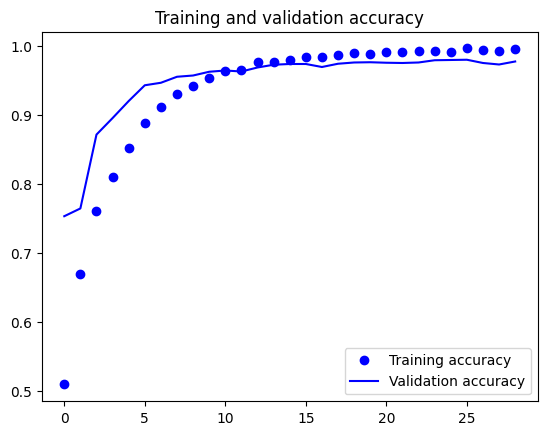

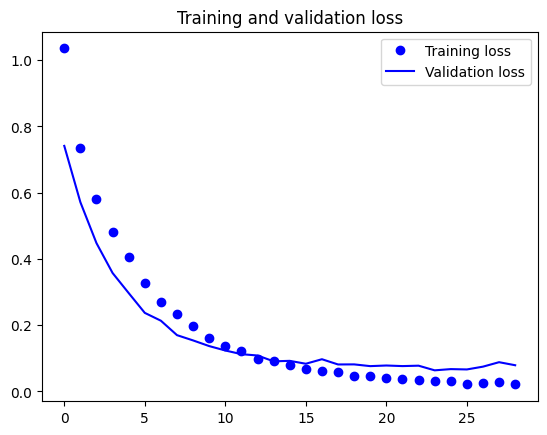

207/207 [==============================] - 1560s 8s/step
Classification report: 
              precision    recall  f1-score   support

        high     0.9924    0.9595    0.9757       815
         low     0.9723    0.9746    0.9734       827
      medium     0.9558    0.9674    0.9615       827
     no_haze     0.9775    0.9952    0.9863       831

    accuracy                         0.9742      3300
   macro avg     0.9745    0.9742    0.9742      3300
weighted avg     0.9744    0.9742    0.9742      3300



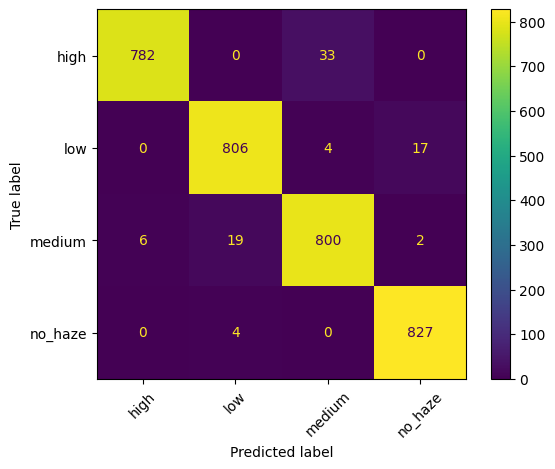

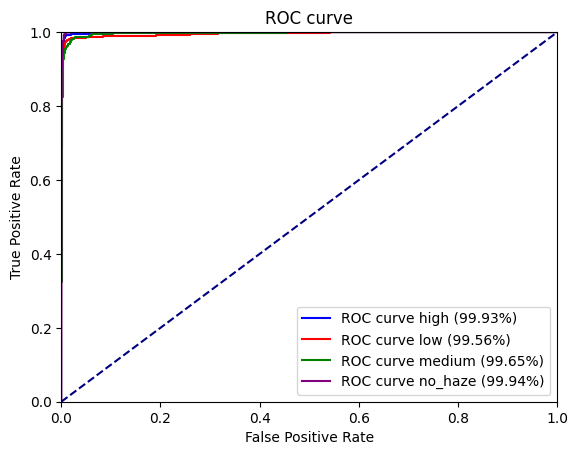

In [15]:
# Aggiungi un nuovo strato fully connected all'ultimo layer di VGG16
inputs = keras.Input(shape=(image_size, image_size, 3))
x = base_model(inputs)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x) # 4 classi
model = keras.Model(inputs=inputs, outputs=outputs)

# Congela i pesi del modello base, così da mantenere l'informazione appresa
for layer in base_model.layers:
    layer.trainable = False

#model = keras.models.load_model(os.path.join(models_path, 'VGG16' + '/' + 'VGG16_model' + '.h5'))

# Compila il modello
compile_model(model)

# Addestra il modello
run_model(model,"VGG16","VGG16_model")

# Valuta il modello
evaluate_model(model,test_generator,"VGG16_model","VGG16")
